In [2]:
import pandas as pd # for data manipulation and analysis
import geopandas as gpd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np  #used ot make multidimensional arrays and matrices
import matplotlib.pyplot as plt  
import plotly.express as px
import seaborn as sns  #based on matplotlib, used to draw attractive graphs 
import warnings
warnings.filterwarnings("ignore")
#ignore warnings

import glob
from PIL import Image

In [3]:
df = pd.read_csv('share-elec-produc-by-source.csv')  #reads the csv file into the notebook
df.head()  #displays first 5 rows 

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0  Afghanistan  AFG  2000                   0.0            33.190578   
1  Afghanistan  AFG  2001                   0.0            15.878378   
2  Afghanistan  AFG  2002                   0.0            19.213974   
3  Afghanistan  AFG  2003                   0.0            32.907348   
4  Afghanistan  AFG  2004                   0.0            36.800895   

   Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0              66.809422                    0.0                   0.0   
1              84.121622                    0.0                   0.0   
2              80.786026                    0.0                   0.0   
3              67.092652                    0.0                   0.0   
4              63.199105                    0.0                   0.0   

   Oil (% electricity)  Nuclear (% electricity)  \
0                  0.0                      0.0   
1                  0.0                      0.0   
2                  0.0                      0.0   
3                  0.0                      0.0   
4                  0.0                      0.0   

   Other renewables (% electricity)  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            6190 non-null   object 
 1   Code                              5423 non-null   object 
 2   Year                              6190 non-null   int64  
 3   Coal (% electricity)              5170 non-null   float64
 4   Gas (% electricity)               5170 non-null   float64
 5   Hydro (% electricity)             6190 non-null   float64
 6   Solar (% electricity)             6190 non-null   float64
 7   Wind (% electricity)              6190 non-null   float64
 8   Oil (% electricity)               5170 non-null   float64
 9   Nuclear (% electricity)           6190 non-null   float64
 10  Other renewables (% electricity)  6155 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 532.1+ KB


In [39]:
df.isnull()

Entity   Code   Year  Coal (% electricity)  Gas (% electricity)  \
0      False  False  False                 False                False   
1      False  False  False                 False                False   
2      False  False  False                 False                False   
3      False  False  False                 False                False   
4      False  False  False                 False                False   
...      ...    ...    ...                   ...                  ...   
6185   False  False  False                 False                False   
6186   False  False  False                 False                False   
6187   False  False  False                 False                False   
6188   False  False  False                 False                False   
6189   False  False  False                 False                False   

      Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                     False                  False                 False   
1                     False                  False                 False   
2                     False                  False                 False   
3                     False                  False                 False   
4                     False                  False                 False   
...                     ...                    ...                   ...   
6185                  False                  False                 False   
6186                  False                  False                 False   
6187                  False                  False                 False   
6188                  False                  False                 False   
6189                  False                  False                 False   

      Oil (% electricity)  Nuclear (% electricity)  \
0                   False                    False   
1                   False                    False   
2                   False                    False   
3                   False                    False   
4                   False                    False   
...                   ...                      ...   
6185                False                    False   
6186                False                    False   
6187                False                    False   
6188                False                    False   
6189                False                    False   

      Other renewables (% electricity)  continent  
0                                False      False  
1                                False      False  
2                                False      False  
3                                False      False  
4                                False      False  
...                                ...        ...  
6185                             False      False  
6186                             False      False  
6187                             False      False  
6188                             False      False  
6189                             False      False  

[6190 rows x 12 columns]

In [6]:
cont = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cont = cont[['name','continent']]

df = df.merge(cont, how='left', left_on='Entity', right_on='name').drop(columns=['name'])

In [7]:
display(df)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0     Afghanistan  AFG  2000              0.000000            33.190578   
1     Afghanistan  AFG  2001              0.000000            15.878378   
2     Afghanistan  AFG  2002              0.000000            19.213974   
3     Afghanistan  AFG  2003              0.000000            32.907348   
4     Afghanistan  AFG  2004              0.000000            36.800895   
...           ...  ...   ...                   ...                  ...   
6185     Zimbabwe  ZWE  2015             45.929709             0.000000   
6186     Zimbabwe  ZWE  2016             54.423459             0.000000   
6187     Zimbabwe  ZWE  2017             44.032199             0.000000   
6188     Zimbabwe  ZWE  2018             43.052791             0.000000   
6189     Zimbabwe  ZWE  2019             42.067115             0.000000   

      Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                 66.809422               0.000000                   0.0   
1                 84.121622               0.000000                   0.0   
2                 80.786026               0.000000                   0.0   
3                 67.092652               0.000000                   0.0   
4                 63.199105               0.000000                   0.0   
...                     ...                    ...                   ...   
6185              52.621600               0.085217                   0.0   
6186              43.291121               0.131851                   0.0   
6187              53.751525               0.150488                   0.0   
6188              54.746404               0.153290                   0.0   
6189              55.493528               0.154763                   0.0   

      Oil (% electricity)  Nuclear (% electricity)  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   
...                   ...                      ...   
6185                  0.0                      0.0   
6186                  0.0                      0.0   
6187                  0.0                      0.0   
6188                  0.0                      0.0   
6189                  0.0                      0.0   

      Other renewables (% electricity) continent  
0                             0.000000      Asia  
1                             0.000000      Asia  
2                             0.000000      Asia  
3                             0.000000      Asia  
4                             0.000000      Asia  
...                                ...       ...  
6185                          1.363475    Africa  
6186                          2.153568    Africa  
6187                          2.065788    Africa  
6188                          2.047515    Africa  
6189                          2.284594    Africa  

[6190 rows x 12 columns]

In [8]:
df.loc[pd.isna(df.continent),:].Entity.unique()

array(['Africa', 'American Samoa', 'Antigua and Barbuda', 'Aruba',
       'Asia Pacific', 'Bahrain', 'Barbados', 'Bermuda',
       'Bosnia and Herzegovina', 'British Virgin Islands', 'CIS',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Comoros', 'Cook Islands', 'Democratic Republic of Congo',
       'Dominica', 'Dominican Republic', 'EU-27', 'EU27+1',
       'Eastern Africa', 'Equatorial Guinea', 'Europe', 'Europe (other)',
       'Falkland Islands', 'Faroe Islands', 'French Guiana',
       'French Polynesia', 'Gibraltar', 'Grenada', 'Guadeloupe', 'Guam',
       'Hong Kong', 'Kiribati', 'Macau', 'Maldives', 'Malta',
       'Martinique', 'Mauritius', 'Middle Africa', 'Middle East',
       'Montserrat', 'Nauru', 'Netherlands Antilles', 'Niue',
       'North America', 'Other Asia & Pacific', 'Other CIS',
       'Other Caribbean', 'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Reunion',
       'Saint H

In [9]:
#asia
df.loc[df.Entity=='Hong Kong','continent'] = 'Asia'
df.loc[df.Entity=='Maldives','continent'] = 'Asia'
df.loc[df.Entity=='Other Middle East','continent'] = 'Asia'
df.loc[df.Entity=='Middle East','continent'] = 'Asia'
df.loc[df.Entity=='Singapore','continent'] = 'Asia'

In [10]:
df_asia = df[df['continent']=='Asia'].reset_index(drop=True)
display(df_asia)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0     Afghanistan  AFG  2000                   0.0            33.190578   
1     Afghanistan  AFG  2001                   0.0            15.878378   
2     Afghanistan  AFG  2002                   0.0            19.213974   
3     Afghanistan  AFG  2003                   0.0            32.907348   
4     Afghanistan  AFG  2004                   0.0            36.800895   
...           ...  ...   ...                   ...                  ...   
1457        Yemen  YEM  2015                   0.0            37.565952   
1458        Yemen  YEM  2016                   0.0            37.107097   
1459        Yemen  YEM  2017                   0.0            36.552807   
1460        Yemen  YEM  2018                   0.0            33.151369   
1461        Yemen  YEM  2019                   0.0            30.663067   

      Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                 66.809422               0.000000                   0.0   
1                 84.121622               0.000000                   0.0   
2                 80.786026               0.000000                   0.0   
3                 67.092652               0.000000                   0.0   
4                 63.199105               0.000000                   0.0   
...                     ...                    ...                   ...   
1457               0.000000               1.858950                   0.0   
1458               0.000000               3.057710                   0.0   
1459               0.000000               4.505791                   0.0   
1460               0.000000              13.392048                   0.0   
1461               0.000000              19.892738                   0.0   

      Oil (% electricity)  Nuclear (% electricity)  \
0                0.000000                      0.0   
1                0.000000                      0.0   
2                0.000000                      0.0   
3                0.000000                      0.0   
4                0.000000                      0.0   
...                   ...                      ...   
1457            60.575098                      0.0   
1458            59.835194                      0.0   
1459            58.941402                      0.0   
1460            53.456583                      0.0   
1461            49.444195                      0.0   

      Other renewables (% electricity) continent  
0                                  0.0      Asia  
1                                  0.0      Asia  
2                                  0.0      Asia  
3                                  0.0      Asia  
4                                  0.0      Asia  
...                                ...       ...  
1457                               0.0      Asia  
1458                               0.0      Asia  
1459                               0.0      Asia  
1460                               0.0      Asia  
1461                               0.0      Asia  

[1462 rows x 12 columns]

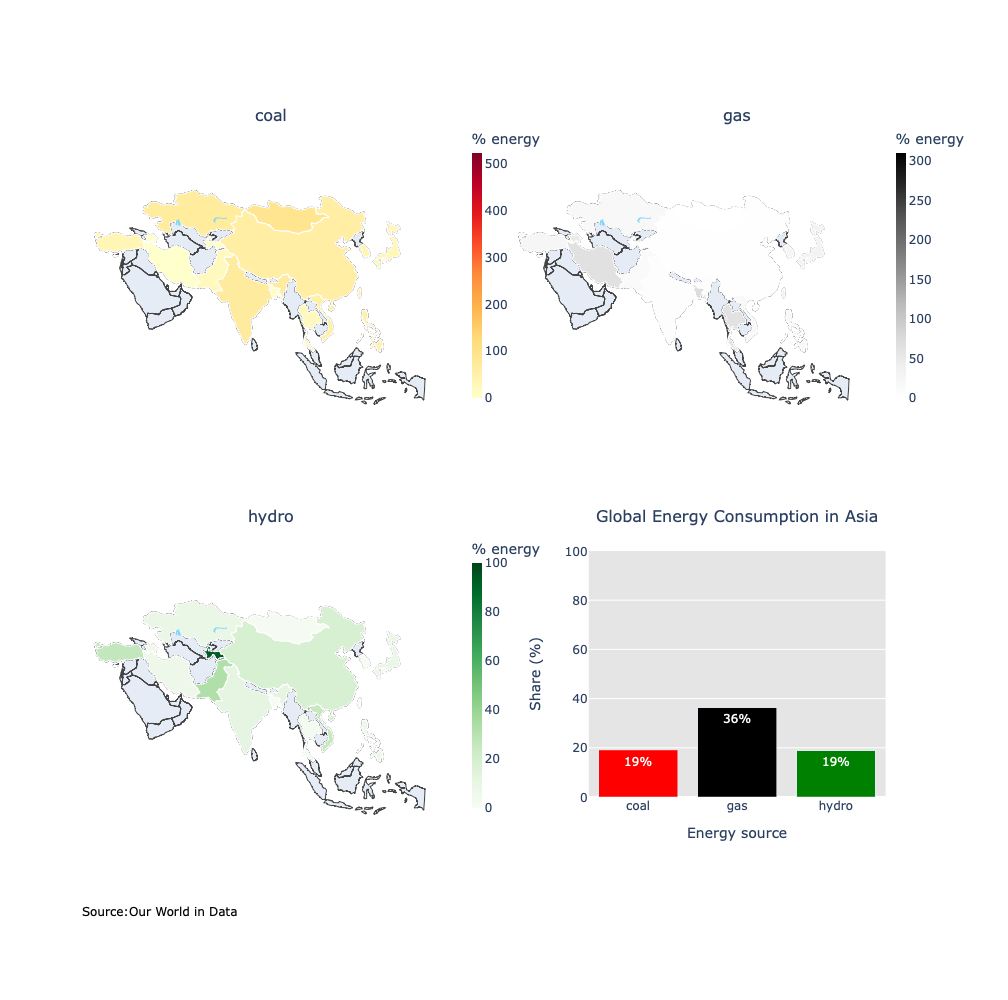

In [11]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Coal (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Gas (% electricity)': [.95,.8,'Greys'],
                    'Hydro (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('coal', 'gas', 'hydro','Global Energy Consumption in Asia'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
         )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'asia',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['coal', 'gas', 'hydro']
    y1 = [df_asia['Coal (% electricity)'].mean(), df_asia['Gas (% electricity)'].mean(), df_asia['Hydro (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

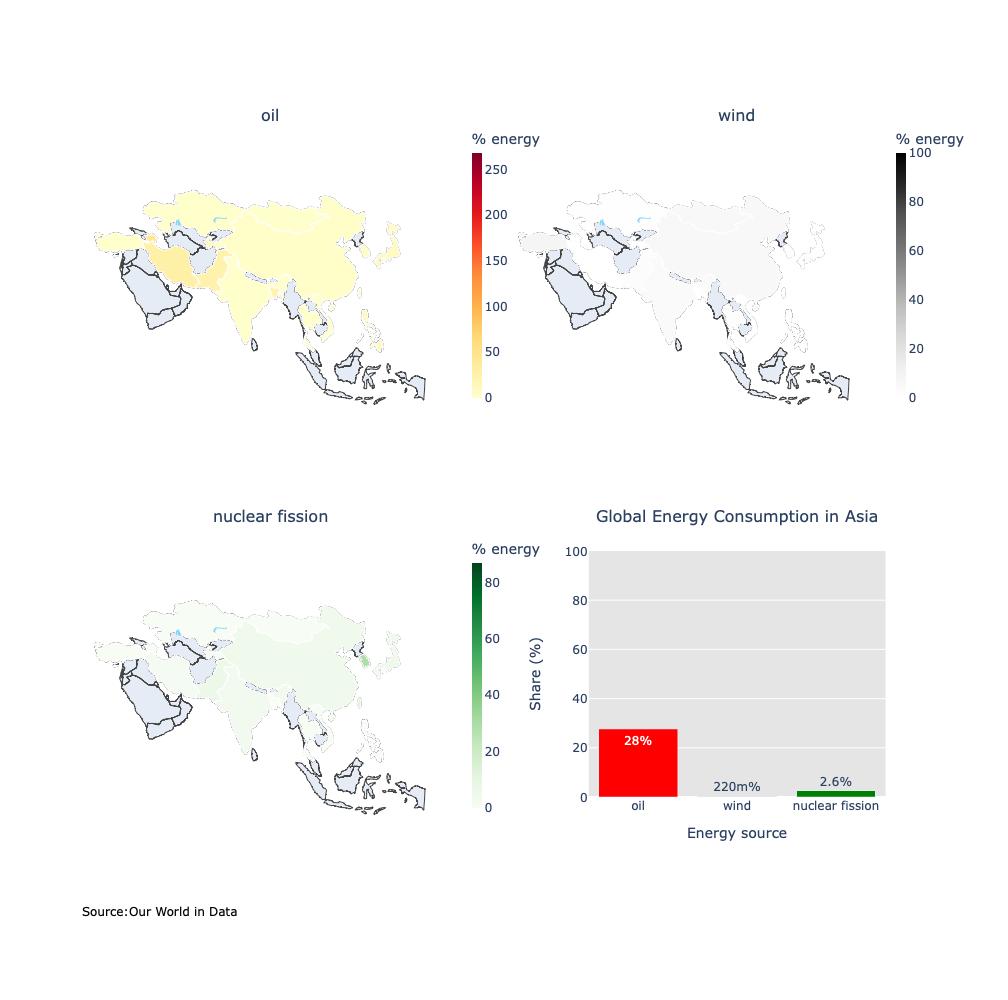

In [33]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Oil (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Wind (% electricity)': [.95,.8,'Greys'],
                    'Nuclear (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('oil', 'wind', 'nuclear fission','Global Energy Consumption in Asia'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'asia',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['oil', 'wind', 'nuclear fission']
    y1 = [df_asia['Oil (% electricity)'].mean(), df_asia['Wind (% electricity)'].mean(), df_asia['Nuclear (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

In [15]:
#europe
df.loc[df.Entity=='Europe','continent'] = 'Europe'


In [16]:
df_europe = df[df['continent']=='Europe'].reset_index(drop=True)
#df_europe = df_europe.drop(df_europe[df_europe['Entity'] == 'Europe(other)'].index)
display(df_europe)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0            Albania  ALB  2000              0.000000             0.000000   
1            Albania  ALB  2001              0.000000             0.000000   
2            Albania  ALB  2002              0.000000             0.000000   
3            Albania  ALB  2003              0.000000             0.000000   
4            Albania  ALB  2004              0.000000             0.000000   
...              ...  ...   ...                   ...                  ...   
1282  United Kingdom  GBR  2016              9.159715            42.815805   
1283  United Kingdom  GBR  2017              6.761199            41.036284   
1284  United Kingdom  GBR  2018              5.127708            40.058527   
1285  United Kingdom  GBR  2019              2.172390            41.086136   
1286  United Kingdom  GBR  2020              1.741105            36.550352   

      Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                 97.109767               0.000000              0.000000   
1                 96.469634               0.000000              0.000000   
2                 95.507285               0.000000              0.000000   
3                 98.072286               0.000000              0.000000   
4                 97.625663               0.000000              0.000000   
...                     ...                    ...                   ...   
1282               1.610986               3.108508             11.096975   
1283               1.771009               3.443688             14.894467   
1284               1.672470               3.917008             17.335863   
1285               1.833484               4.059256             20.195392   
1286               2.159324               4.371459             24.150984   

      Oil (% electricity)  Nuclear (% electricity)  \
0                2.890233                 0.000000   
1                3.530366                 0.000000   
2                4.492715                 0.000000   
3                1.927714                 0.000000   
4                2.374337                 0.000000   
...                   ...                      ...   
1282             2.228506                21.422252   
1283             1.974748                21.107377   
1284             2.049886                19.821784   
1285             2.124547                17.894719   
1286             2.450122                16.962830   

      Other renewables (% electricity) continent  
0                             0.000000    Europe  
1                             0.000000    Europe  
2                             0.000000    Europe  
3                             0.000000    Europe  
4                             0.000000    Europe  
...                                ...       ...  
1282                          8.557254    Europe  
1283                          9.011227    Europe  
1284                         10.016753    Europe  
1285                         10.634077    Europe  
1286                         11.613823    Europe  

[1287 rows x 12 columns]

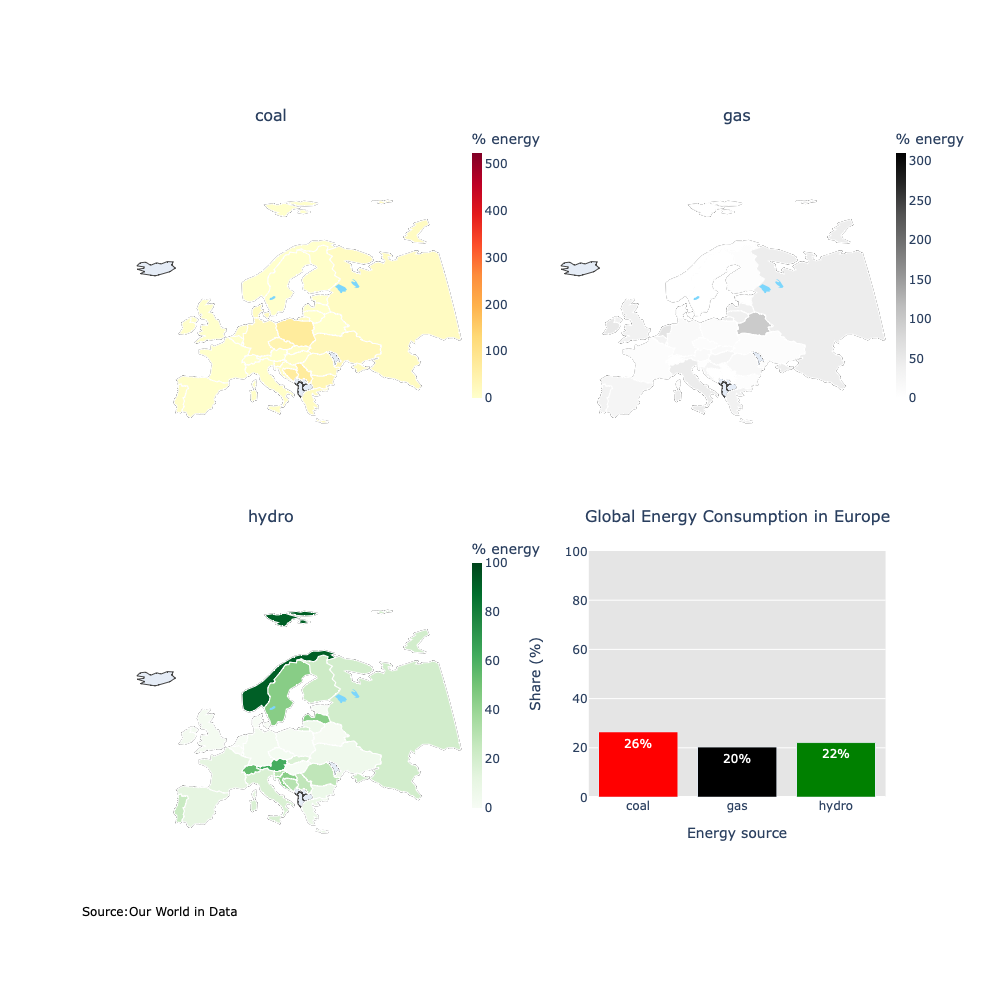

In [17]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Coal (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Gas (% electricity)': [.95,.8,'Greys'],
                    'Hydro (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('coal', 'gas', 'hydro','Global Energy Consumption in Europe'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'europe',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['coal', 'gas', 'hydro']
    y1 = [df_europe['Coal (% electricity)'].mean(), df_europe['Gas (% electricity)'].mean(), df_europe['Hydro (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

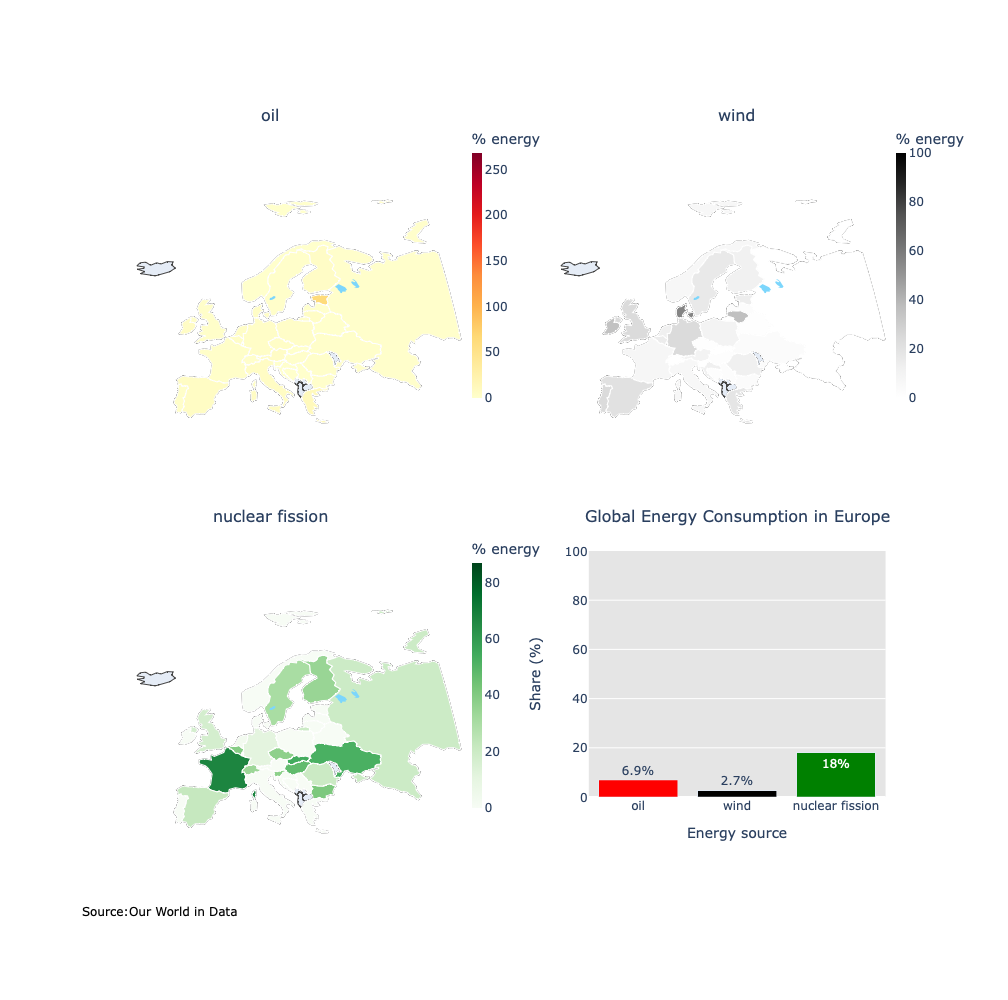

In [34]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Oil (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Wind (% electricity)': [.95,.8,'Greys'],
                    'Nuclear (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('oil', 'wind', 'nuclear fission','Global Energy Consumption in Europe'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'europe',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['oil', 'wind', 'nuclear fission']
    y1 = [df_europe['Oil (% electricity)'].mean(), df_europe['Wind (% electricity)'].mean(), df_europe['Nuclear (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

In [19]:
#africa
df.loc[df.Entity=='Africa','continent'] = 'Africa'
df.loc[df.Entity=='Western Sahara','continent'] = 'Africa'
df.loc[df.Entity=='Central African Republic','continent'] = 'Africa'
df.loc[df.Entity=='Democratic Republic of Congo','continent'] = 'Africa'
df.loc[df.Entity=='Eastern Africa','continent'] = 'Africa'
df.loc[df.Entity=='Middle Africa','continent'] = 'Africa'

In [20]:
df_africa = df[df['continent']=='Africa'].reset_index(drop=True)
display(df_africa)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0       Africa  NaN  1985             53.869485            10.783022   
1       Africa  NaN  1986             52.600209            10.495367   
2       Africa  NaN  1987             54.316611            11.269555   
3       Africa  NaN  1988             51.625800            11.517103   
4       Africa  NaN  1989             51.267484            12.046066   
...        ...  ...   ...                   ...                  ...   
1073  Zimbabwe  ZWE  2015             45.929709             0.000000   
1074  Zimbabwe  ZWE  2016             54.423459             0.000000   
1075  Zimbabwe  ZWE  2017             44.032199             0.000000   
1076  Zimbabwe  ZWE  2018             43.052791             0.000000   
1077  Zimbabwe  ZWE  2019             42.067115             0.000000   

      Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                 19.093587               0.000000                   0.0   
1                 18.935040               0.000000                   0.0   
2                 17.503940               0.000000                   0.0   
3                 18.149086               0.000000                   0.0   
4                 18.352067               0.000000                   0.0   
...                     ...                    ...                   ...   
1073              52.621600               0.085217                   0.0   
1074              43.291121               0.131851                   0.0   
1075              53.751525               0.150488                   0.0   
1076              54.746404               0.153290                   0.0   
1077              55.493528               0.154763                   0.0   

      Oil (% electricity)  Nuclear (% electricity)  \
0               13.242261                 2.052236   
1               13.766315                 3.259047   
2               13.802774                 2.200460   
3               14.430585                 3.553388   
4               14.132786                 3.619461   
...                   ...                      ...   
1073             0.000000                 0.000000   
1074             0.000000                 0.000000   
1075             0.000000                 0.000000   
1076             0.000000                 0.000000   
1077             0.000000                 0.000000   

      Other renewables (% electricity) continent  
0                             0.103867    Africa  
1                             0.243975    Africa  
2                             0.234782    Africa  
3                             0.211991    Africa  
4                             0.201208    Africa  
...                                ...       ...  
1073                          1.363475    Africa  
1074                          2.153568    Africa  
1075                          2.065788    Africa  
1076                          2.047515    Africa  
1077                          2.284594    Africa  

[1078 rows x 12 columns]

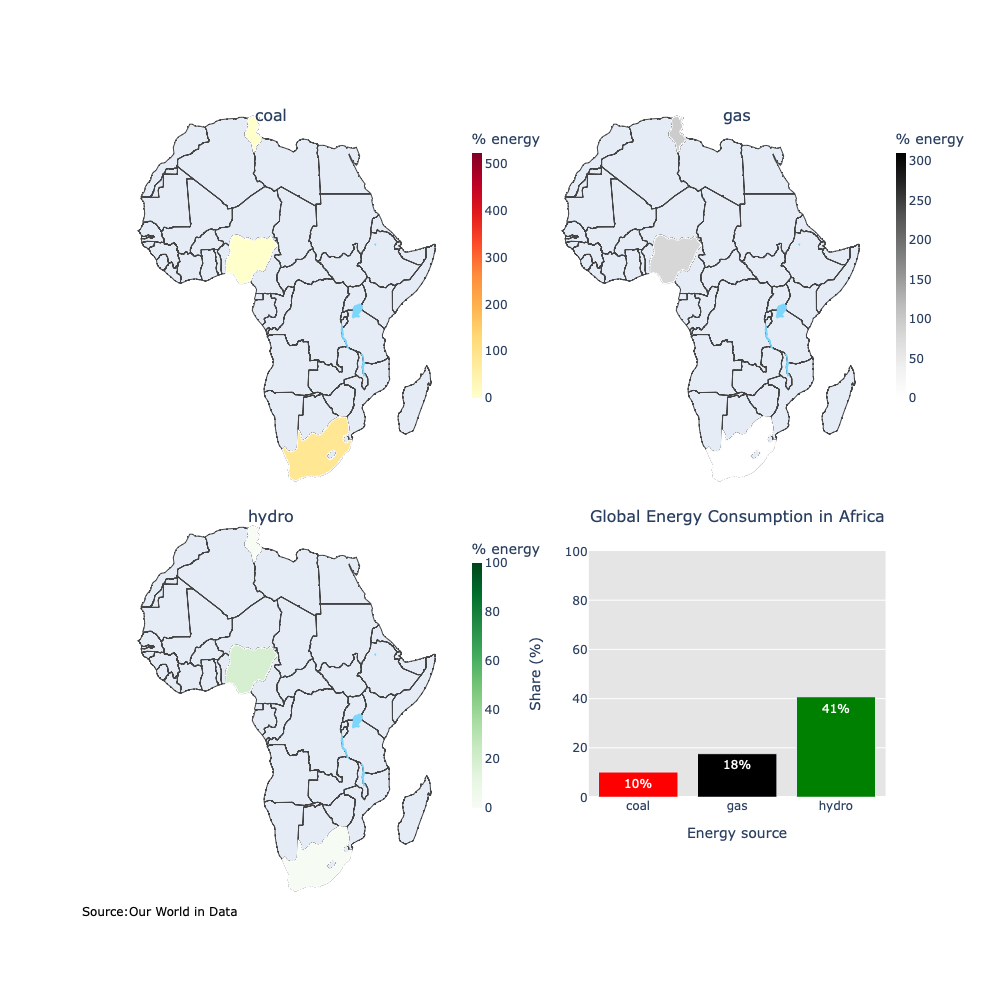

In [21]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Coal (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Gas (% electricity)': [.95,.8,'Greys'],
                    'Hydro (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('coal', 'gas', 'hydro','Global Energy Consumption in Africa'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'africa',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['coal', 'gas', 'hydro']
    y1 = [df_africa['Coal (% electricity)'].mean(), df_africa['Gas (% electricity)'].mean(), df_africa['Hydro (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

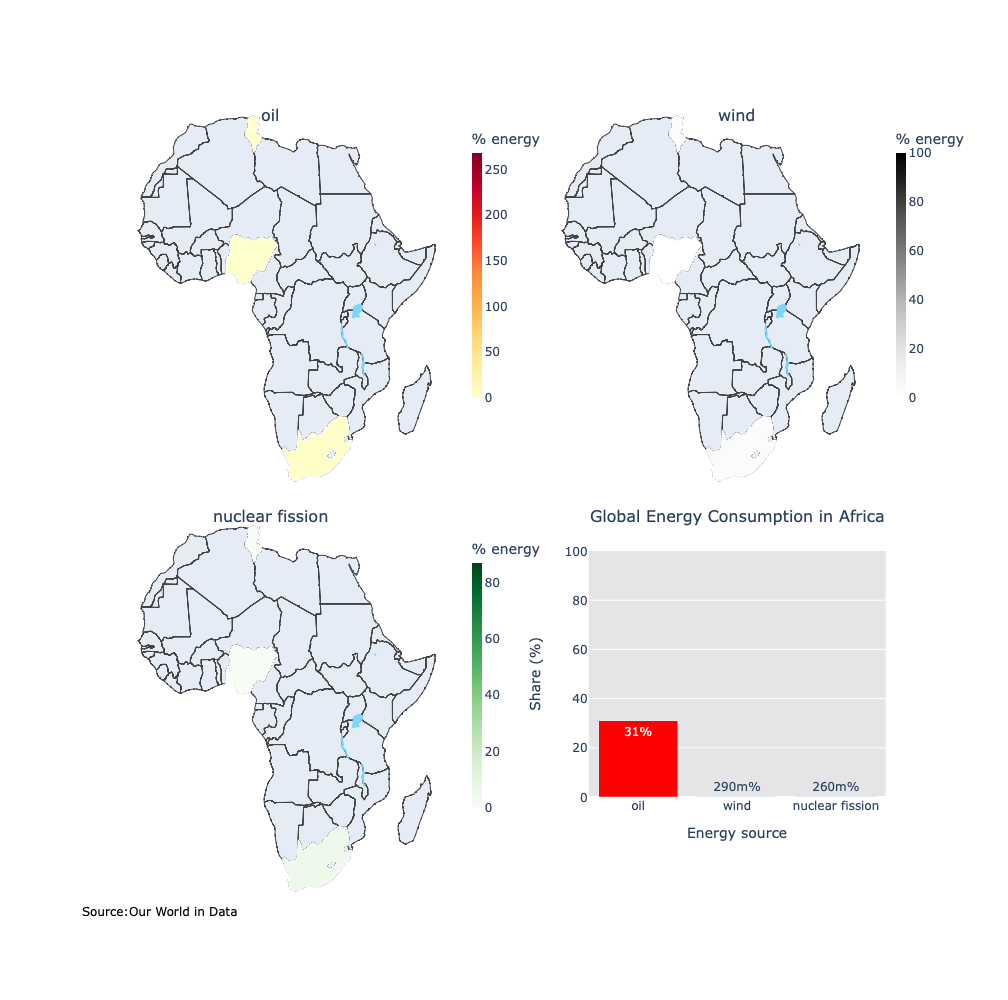

In [35]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Oil (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Wind (% electricity)': [.95,.8,'Greys'],
                    'Nuclear (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('oil', 'wind', 'nuclear fission','Global Energy Consumption in Africa'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'africa',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['oil', 'wind', 'nuclear fission']
    y1 = [df_africa['Oil (% electricity)'].mean(), df_africa['Wind (% electricity)'].mean(), df_africa['Nuclear (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

In [24]:
# north america
df.loc[df.Entity=='North America','continent'] = 'North America'
df.loc[df.Entity=='United States','continent'] = 'North America'
df_northamerica = df[df['continent']=='North America'].reset_index(drop=True)
display(df_northamerica)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0          Bahamas  BHS  2000              0.000000             0.000000   
1          Bahamas  BHS  2001              0.000000             0.000000   
2          Bahamas  BHS  2002              0.000000             0.000000   
3          Bahamas  BHS  2003              0.000000             0.000000   
4          Bahamas  BHS  2004              0.000000             0.000000   
..             ...  ...   ...                   ...                  ...   
434  United States  USA  2016             30.256440            33.967004   
435  United States  USA  2017             29.713105            32.252330   
436  United States  USA  2018             27.259262            35.257174   
437  United States  USA  2019             23.185858            38.403812   
438  United States  USA  2020             19.107033            40.229594   

     Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                 0.000000               0.000000              0.000000   
1                 0.000000               0.000000              0.000000   
2                 0.000000               0.000000              0.000000   
3                 0.000000               0.000000              0.000000   
4                 0.000000               0.000000              0.000000   
..                     ...                    ...                   ...   
434               6.375945               1.339682              5.542504   
435               7.240506               1.904177              6.266297   
436               6.817882               2.220885              6.485582   
437               6.790588               2.568435              7.085962   
438               7.056802               3.274951              8.309780   

     Oil (% electricity)  Nuclear (% electricity)  \
0             100.000000                 0.000000   
1             100.000000                 0.000000   
2             100.000000                 0.000000   
3             100.000000                 0.000000   
4             100.000000                 0.000000   
..                   ...                      ...   
434             0.926850                19.672725   
435             0.849775                19.834842   
436             0.908645                19.198301   
437             0.763413                19.448378   
438             0.714773                19.504903   

     Other renewables (% electricity)      continent  
0                            0.000000  North America  
1                            0.000000  North America  
2                            0.000000  North America  
3                            0.000000  North America  
4                            0.000000  North America  
..                                ...            ...  
434                          1.918850  North America  
435                          1.938969  North America  
436                          1.852269  North America  
437                          1.753554  North America  
438                          1.802165  North America  

[439 rows x 12 columns]

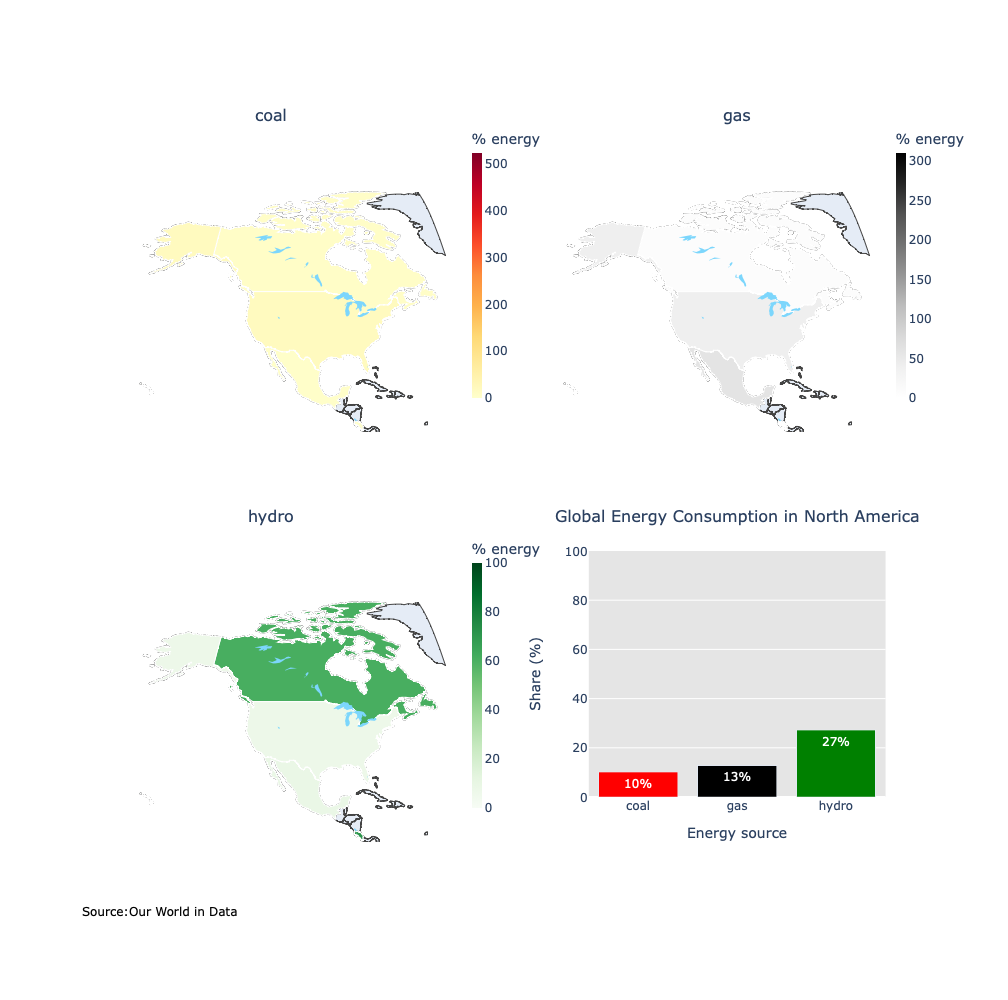

In [25]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Coal (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Gas (% electricity)': [.95,.8,'Greys'],
                    'Hydro (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('coal', 'gas', 'hydro','Global Energy Consumption in North America'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'north america',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['coal', 'gas', 'hydro']
    y1 = [df_northamerica['Coal (% electricity)'].mean(), df_northamerica['Gas (% electricity)'].mean(), df_northamerica['Hydro (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

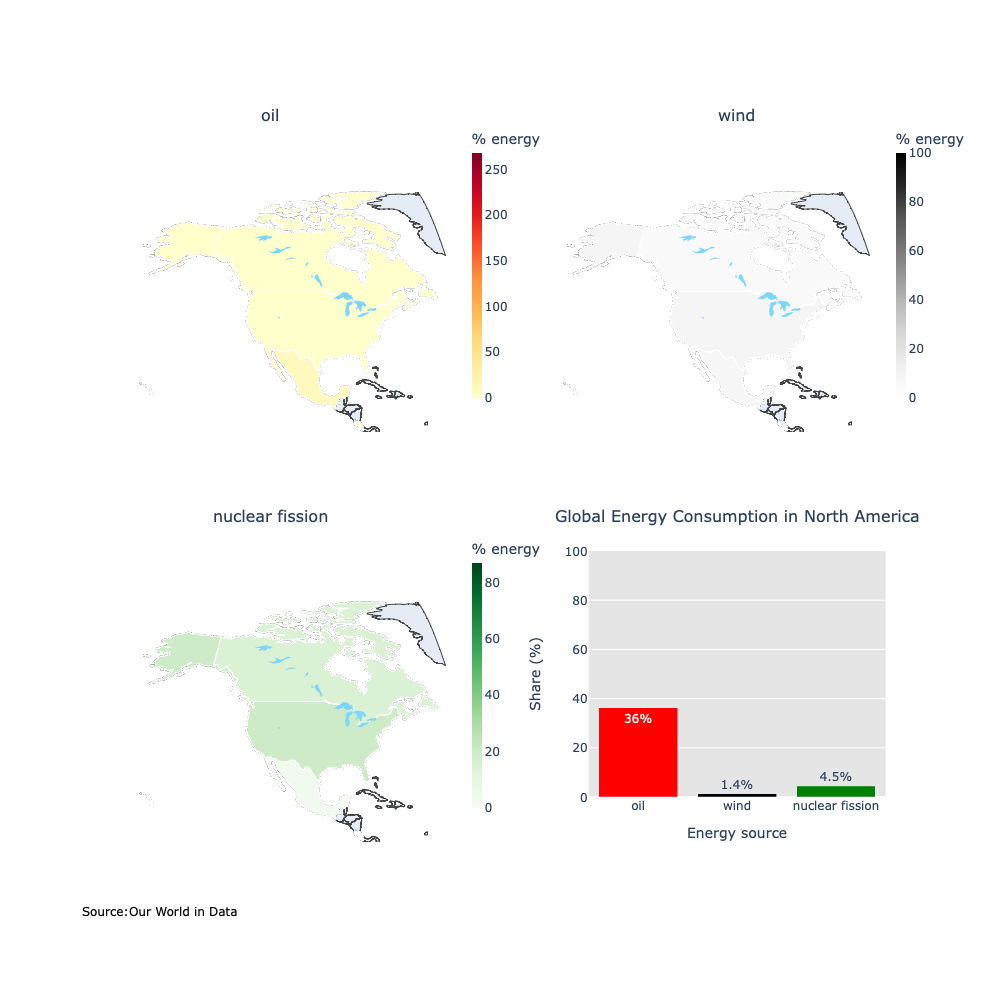

In [36]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Oil (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Wind (% electricity)': [.95,.8,'Greys'],
                    'Nuclear (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('oil', 'wind', 'nuclear fission','Global Energy Consumption in North America'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'north america',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['oil', 'wind', 'nuclear fission']
    y1 = [df_northamerica['Oil (% electricity)'].mean(), df_northamerica['Wind (% electricity)'].mean(), df_northamerica['Nuclear (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

In [27]:
# south america
df.loc[df.Entity=='South & Central America','continent'] = 'South America'
df_southamerica = df[df['continent']=='South America'].reset_index(drop=True)
display(df_southamerica)

Entity Code  Year  Coal (% electricity)  Gas (% electricity)  \
0    Argentina  ARG  1985              1.339846            27.511674   
1    Argentina  ARG  1986              2.066411            27.070890   
2    Argentina  ARG  1987              1.949524            24.097063   
3    Argentina  ARG  1988              3.020980            39.153457   
4    Argentina  ARG  1989              1.700653            47.790140   
..         ...  ...   ...                   ...                  ...   
382  Venezuela  VEN  1995                   NaN                  NaN   
383  Venezuela  VEN  1996                   NaN                  NaN   
384  Venezuela  VEN  1997                   NaN                  NaN   
385  Venezuela  VEN  1998                   NaN                  NaN   
386  Venezuela  VEN  1999                   NaN                  NaN   

     Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
0                45.572409                    0.0                   0.0   
1                42.856100                    0.0                   0.0   
2                41.909015                    0.0                   0.0   
3                28.634548                    0.0                   0.0   
4                25.490136                    0.0                   0.0   
..                     ...                    ...                   ...   
382              70.051466                    0.0                   0.0   
383              71.237498                    0.0                   0.0   
384              73.358440                    0.0                   0.0   
385              71.594730                    0.0                   0.0   
386              75.200099                    0.0                   0.0   

     Oil (% electricity)  Nuclear (% electricity)  \
0              12.594990                12.727429   
1              16.102911                11.649826   
2              19.337899                12.405191   
3              16.447769                11.043910   
4              14.163589                 9.907042   
..                   ...                      ...   
382                  NaN                 0.000000   
383                  NaN                 0.000000   
384                  NaN                 0.000000   
385                  NaN                 0.000000   
386                  NaN                 0.000000   

     Other renewables (% electricity)      continent  
0                            0.228064  South America  
1                            0.218429  South America  
2                            0.207534  South America  
3                            0.230699  South America  
4                            0.234704  South America  
..                                ...            ...  
382                          0.000000  South America  
383                          0.000000  South America  
384                          0.000000  South America  
385                          0.000000  South America  
386                          0.000000  South America  

[387 rows x 12 columns]

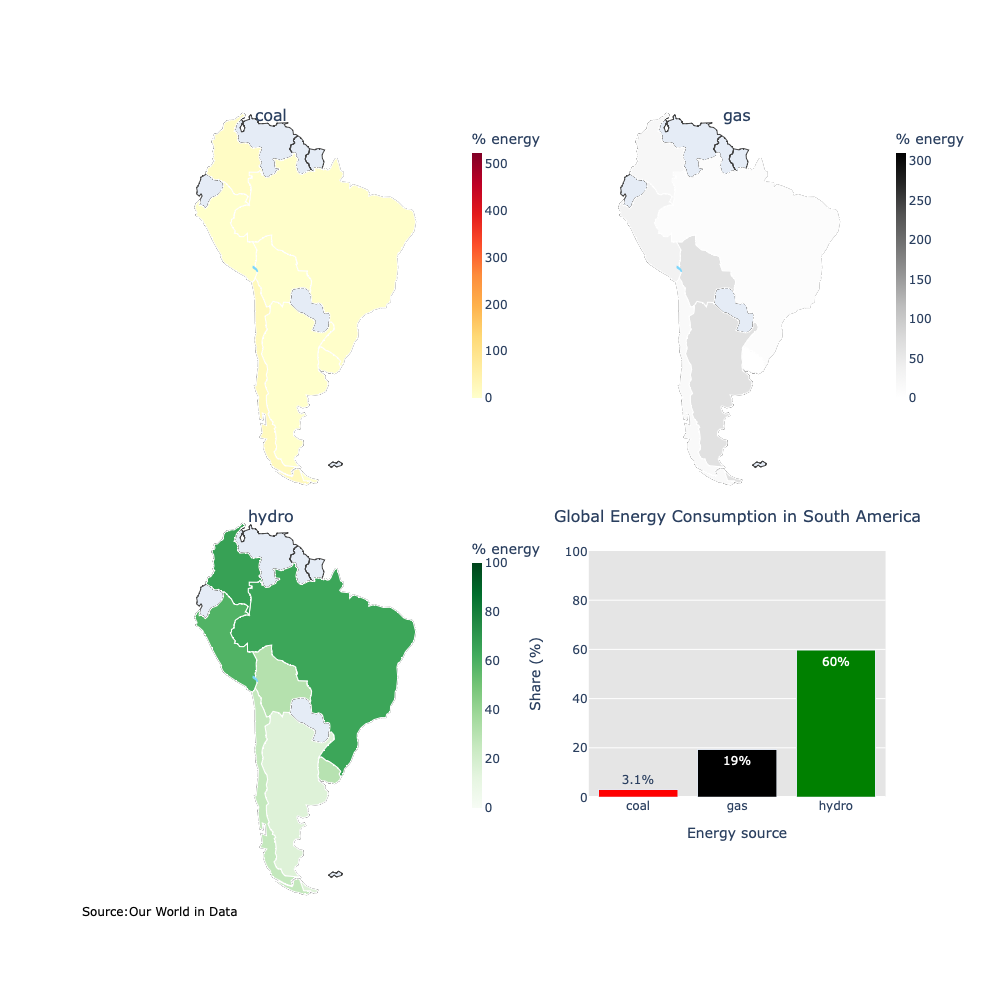

In [28]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Coal (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Gas (% electricity)': [.95,.8,'Greys'],
                    'Hydro (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('coal', 'gas', 'hydro','Global Energy Consumption in South America'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'south america',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['coal', 'gas', 'hydro']
    y1 = [df_southamerica['Coal (% electricity)'].mean(), df_southamerica['Gas (% electricity)'].mean(), df_southamerica['Hydro (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()

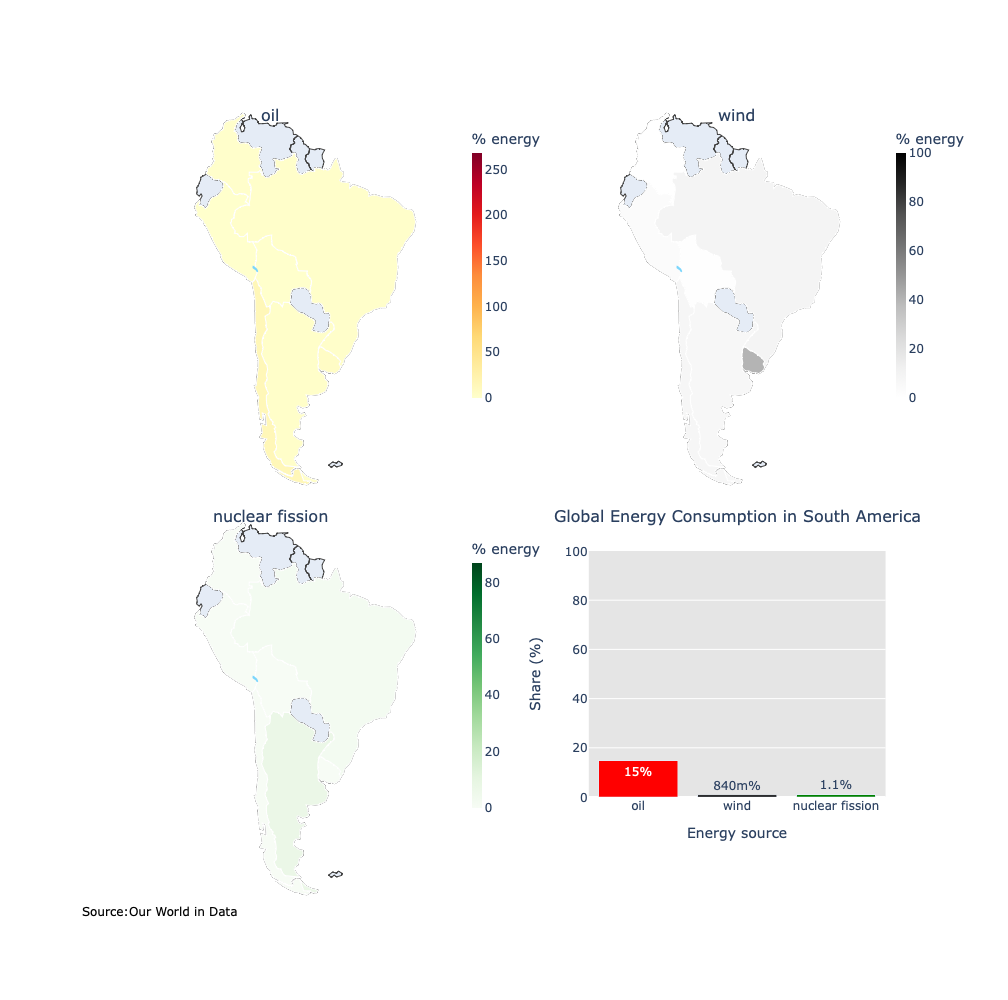

In [37]:
steps = list()    
for i in range(df['Year'].min(),df['Year'].max()+1):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(df['Year'].unique()) * 2],
        label=' {}'.format(i)
    )
    steps.append(step)

# create a dataframe for styling
map_ = pd.DataFrame({'Oil (% electricity)': [0.45,0.8,'YlOrRd'],
                    'Wind (% electricity)': [.95,.8,'Greys'],
                    'Nuclear (% electricity)': [0.45,0.3,'Greens'],
                     })

# create subplots
ite=0
for year in range(df['Year'].min(),df['Year'].max()+1):
    fig = make_subplots(rows=2, cols=2, 
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}], 
                               [{"type": "choropleth"}, {"type": "bar"}]], 
                        subplot_titles=('oil', 'wind', 'nuclear fission','Global Energy Consumption in South America'))

    layout = dict(
        autosize = False,
        width = 1000,
        height = 1000,
        plot_bgcolor='rgba(0,0,0,0.1)',
        xaxis= {'title': 'Energy source','domain':[0.6, 0.95]},
        yaxis= {'title': 'Share (%)', 'range': [0, 100],'domain':[0.15, 0.45]},

        # sliders=[dict(
        #     active=ite,
        #     steps=steps,
        #     y=1.2,
        #     )],
        )

    # plot the three maps
    df2 = df[df['Year']==year].reset_index(drop=True)
    r=0
    z=0
    for index, col in enumerate(map_):

        geo_key = 'geo'+str(index+1)

        fig.add_trace(go.Choropleth(
                locations=df2['Code'],
                z=df2[col].astype(float),
                locationmode='ISO-3',
                colorscale=map_[col][2],
                autocolorscale=False,
                marker_line_color='white',
                geo=geo_key,
                zmin=df[col].min(),
                zmax=df[col].max(),

                colorbar=dict(
                    title = '% energy',
                    thickness=10, 
                    x=map_[col][0], 
                    y=map_[col][1],
                    len=0.35),
                    ), 

                row=1+r, col=z+1)

        z = z+1
        if z==2:
            r = r+1
            z = z-2

        layout[geo_key] = dict(
                scope = 'south america',
                projection_type='natural earth',
                domain = dict( x = [], y = [] ),
                lakecolor='#7cd6fc',
                )


    # position of maps
    z = 0
    COLS = 2
    ROWS = 2
    for y in reversed(range(ROWS)):
        for x in range(COLS):
            geo_key = 'geo'+str(z+1)
            layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)-.03]
            layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
            z=z+1
            if z > 2:
                break


    # bar plot
    x1 = ['oil', 'wind', 'nuclear fission']
    y1 = [df_southamerica['Oil (% electricity)'].mean(), df_southamerica['Wind (% electricity)'].mean(), df_southamerica['Nuclear (% electricity)'].mean()]

    fig.add_trace(go.Bar(
            x=x1, 
            y=y1,
            text=y1,
            texttemplate = '%{text:.2s}%',
            textposition='auto',
            marker_color=['red','black','green'],
            width=.8,
            ), 
            row=2, col=2)


    ite=ite+1


    fig.add_annotation(
        text='Source:\
<a href="https://ourworldindata.org/energy">\
Our World in Data</a>',    
        xref="paper", 
        yref="paper",
        font_color='black',
        x=0, y=0, 
        showarrow=False)

    fig.layout.annotations[0].update(y=0.97)
    fig.layout.annotations[1].update(y=0.97)
    fig.layout.annotations[2].update(y=0.48)
    fig.layout.annotations[3].update(y=0.48)

    fig.update_layout(layout)
#     fig.write_image("images/"+str(year)+".jpg",scale=2)

fig.show()